**morphological operations**

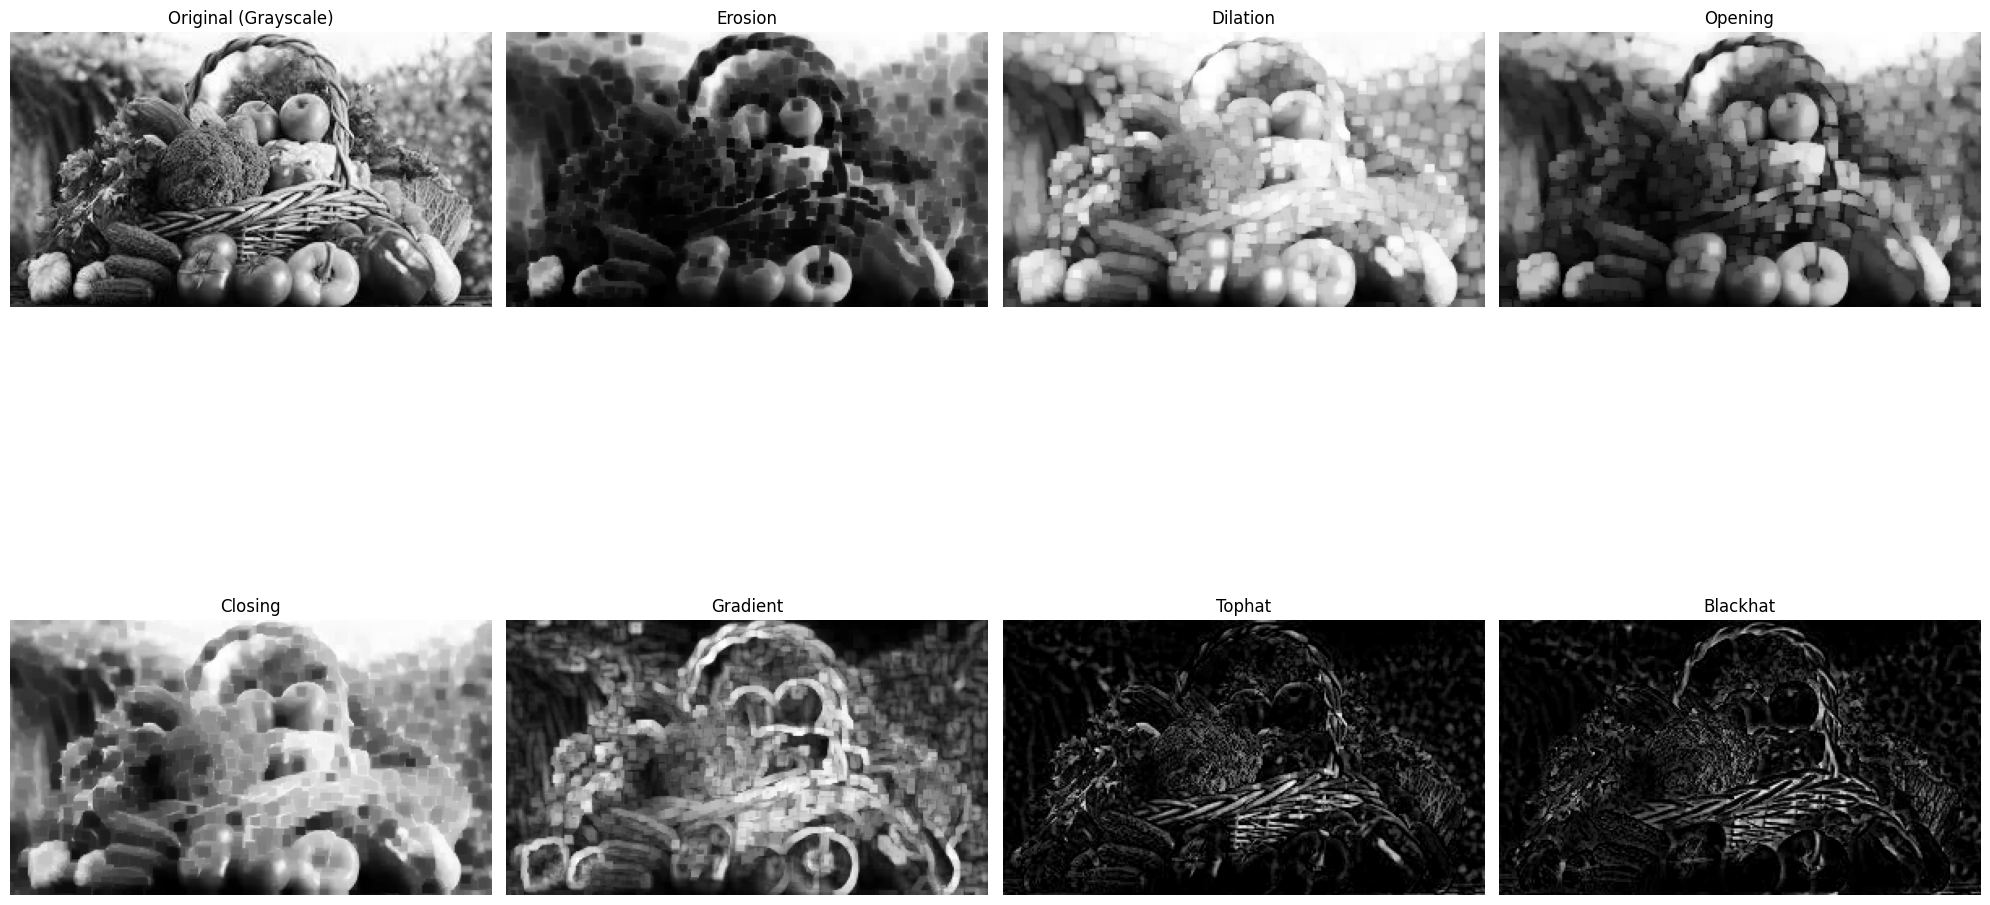

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read image and convert to grayscale
img = cv.imread("/content/download (2).jpeg", 1)
if img is None:
    print("Error: Could not load image. Check the file path.")
else:
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Define kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)

    # Apply morphological operations
    erosion = cv.erode(gray, kernel, iterations=1)
    dilation = cv.dilate(gray, kernel, iterations=1)
    opening = cv.morphologyEx(gray, cv.MORPH_OPEN, kernel)
    closing = cv.morphologyEx(gray, cv.MORPH_CLOSE, kernel)
    gradient = cv.morphologyEx(gray, cv.MORPH_GRADIENT, kernel)
    tophat = cv.morphologyEx(gray, cv.MORPH_TOPHAT, kernel)
    blackhat = cv.morphologyEx(gray, cv.MORPH_BLACKHAT, kernel)

    # Create a list of titles and corresponding images
    titles = ['Original (Grayscale)', 'Erosion', 'Dilation', 'Opening', 'Closing', 'Gradient', 'Tophat', 'Blackhat']
    images = [gray, erosion, dilation, opening, closing, gradient, tophat, blackhat]

    # Plot all images in a single figure
    plt.figure(figsize=(20, 15))
    for i in range(len(images)):
        plt.subplot(2, 4, i + 1)  # 2 rows, 4 columns
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

    # Display the plot
    plt.tight_layout()
    plt.show()


**Edge Detection**

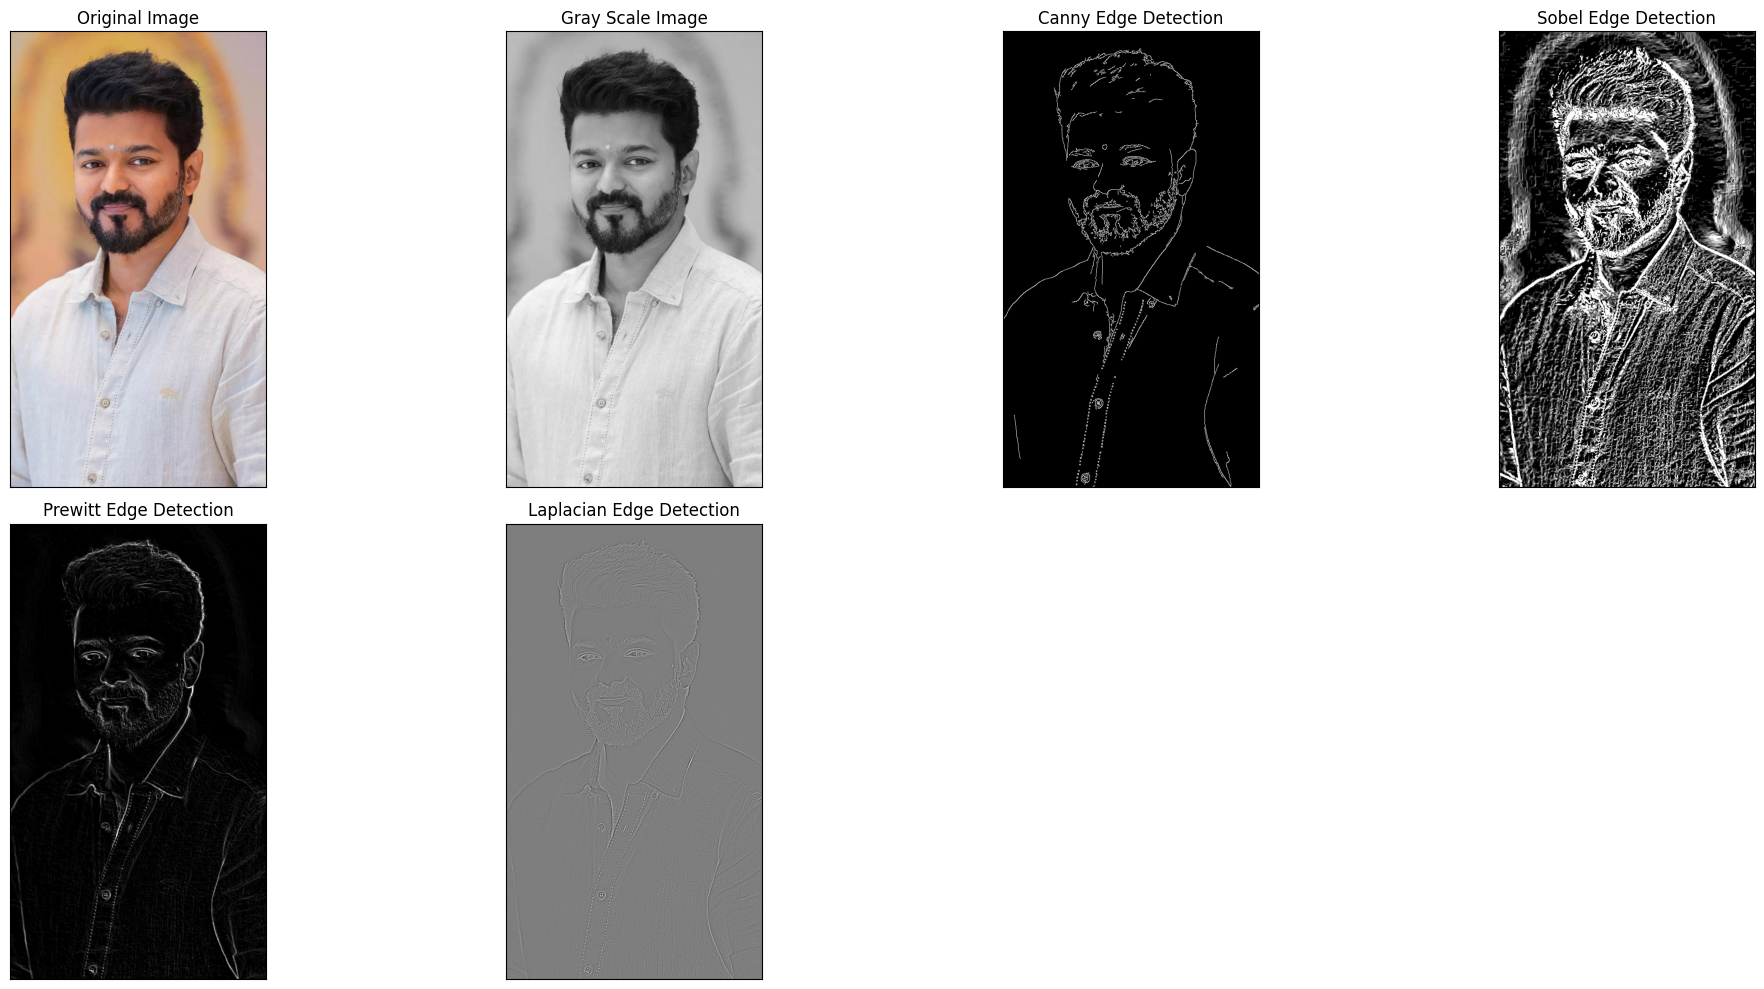

In [ ]:
import cv2
import numpy as np
import scipy.ndimage as nd
from scipy import signal
import matplotlib.pyplot as plt

# Load the original image and convert to grayscale
img = cv2.imread("/content/3680b1ea39cbe4ec8c88f23e4e5ae2fd (1).jpg", 1)
if img is None:
    raise FileNotFoundError("The specified image path is incorrect or the image cannot be found.")
original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussian Blur
img_gaussian = cv2.GaussianBlur(gray, (3, 3), 0)

# Canny Edge Detection
img_canny = cv2.Canny(gray, 100, 200)

# Sobel Edge Detection
img_sobelx = cv2.Sobel(img_gaussian, cv2.CV_8U, 1, 0, ksize=5)
img_sobely = cv2.Sobel(img_gaussian, cv2.CV_8U, 0, 1, ksize=5)
img_sobel = img_sobelx + img_sobely

# Prewitt Edge Detection
kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
img_prewitt = img_prewittx + img_prewitty

# Laplacian Edge Detection
laplacian = cv2.Laplacian(img_gaussian, cv2.CV_64F)



# Plotting the results
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1), plt.imshow(original_img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 4, 2), plt.imshow(gray, cmap='gray')
plt.title('Gray Scale Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 4, 3), plt.imshow(img_canny, cmap='gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 4, 4), plt.imshow(img_sobel, cmap='gray')
plt.title('Sobel Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 4, 5), plt.imshow(img_prewitt, cmap='gray')
plt.title('Prewitt Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 4, 6), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


**histogram** **equalization**

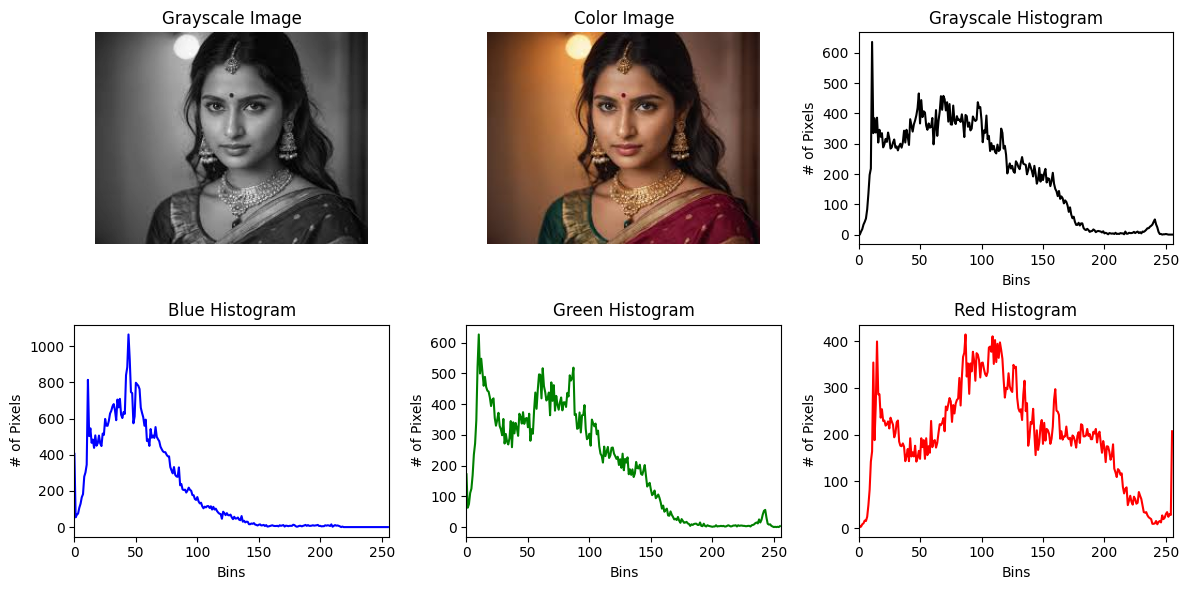

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(r'/content/download (1).jpeg')

if image is None:
    print("Error: Unable to read the image file.")
else:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    images = [gray_image, image]
    titles = ['Grayscale Image', 'Color Image']
    channels = ['Grayscale', 'Blue', 'Green', 'Red']
    colors = ['black', 'blue', 'green', 'red']

    plt.figure(figsize=(12, 6))

    for i in range(2):
        plt.subplot(2, 3, i + 1)
        if i == 0:
            plt.imshow(images[i], cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')

    for j, (channel, color) in enumerate(zip(channels, colors)):
        plt.subplot(2, 3, j + 3)
        if channel == 'Grayscale':
            hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
        else:
            hist = cv2.calcHist([image], [j - 1], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.title(f'{channel} Histogram')
        plt.xlabel('Bins')
        plt.ylabel('# of Pixels')
        plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()


Saving 3680b1ea39cbe4ec8c88f23e4e5ae2fd.jpg to 3680b1ea39cbe4ec8c88f23e4e5ae2fd (1).jpg


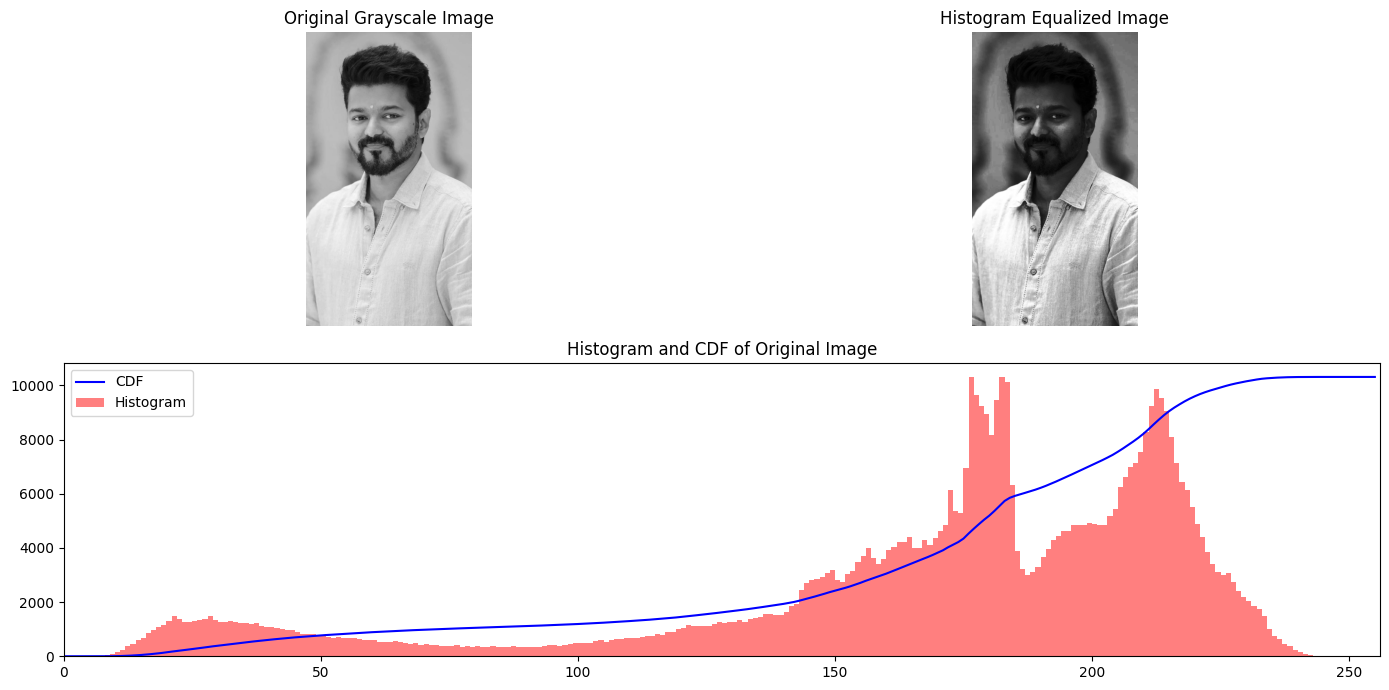

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# Read the image
image_pat = next(iter(uploaded))
image = cv2.imread(image_pat)

# Check if the image is read correctly
if image is None:
    raise FileNotFoundError('Could not open or find the image.')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization using OpenCV's built-in function
equ = cv2.equalizeHist(gray)

# Display the original and equalized images side by side using matplotlib
plt.figure(figsize=(14, 7))

# Display the original grayscale image
plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Display the histogram equalized image
plt.subplot(2, 2, 2)
plt.imshow(equ, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

# Calculate and plot histogram and CDF of the original grayscale image
histGray, bins = np.histogram(gray.flatten(), 256, [0,256])
cdfGray = histGray.cumsum()
cdfGray_normalized = cdfGray * histGray.max() / cdfGray.max()

plt.subplot(2, 1, 2)
plt.plot(cdfGray_normalized, color='b')
plt.hist(gray.flatten(), 256, [0,256], color='r', alpha=0.5)
plt.xlim([0,256])
plt.legend(('CDF','Histogram'), loc='upper left')
plt.title('Histogram and CDF of Original Image')

# Show the plots
plt.tight_layout()
plt.show()

**harris corner**

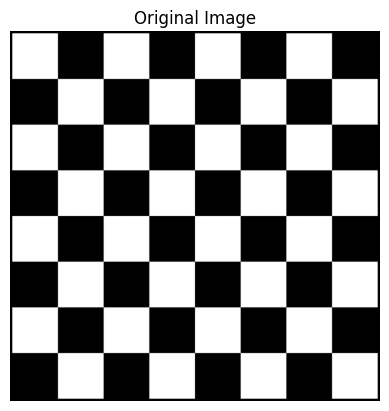

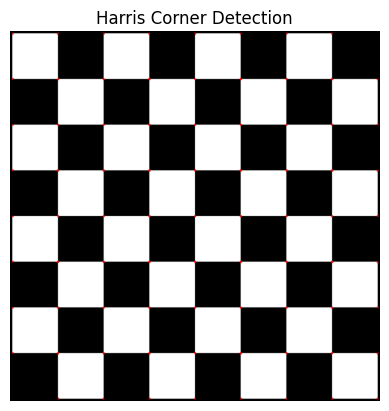

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/Chess_Board.svg.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib display

# Display original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Apply Harris Corner Detection
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Result is dilated for marking the corners
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image
img[dst > 0.01 * dst.max()] = [255, 0, 0]

# Display result
plt.imshow(img)
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()


**Brute FORCE**

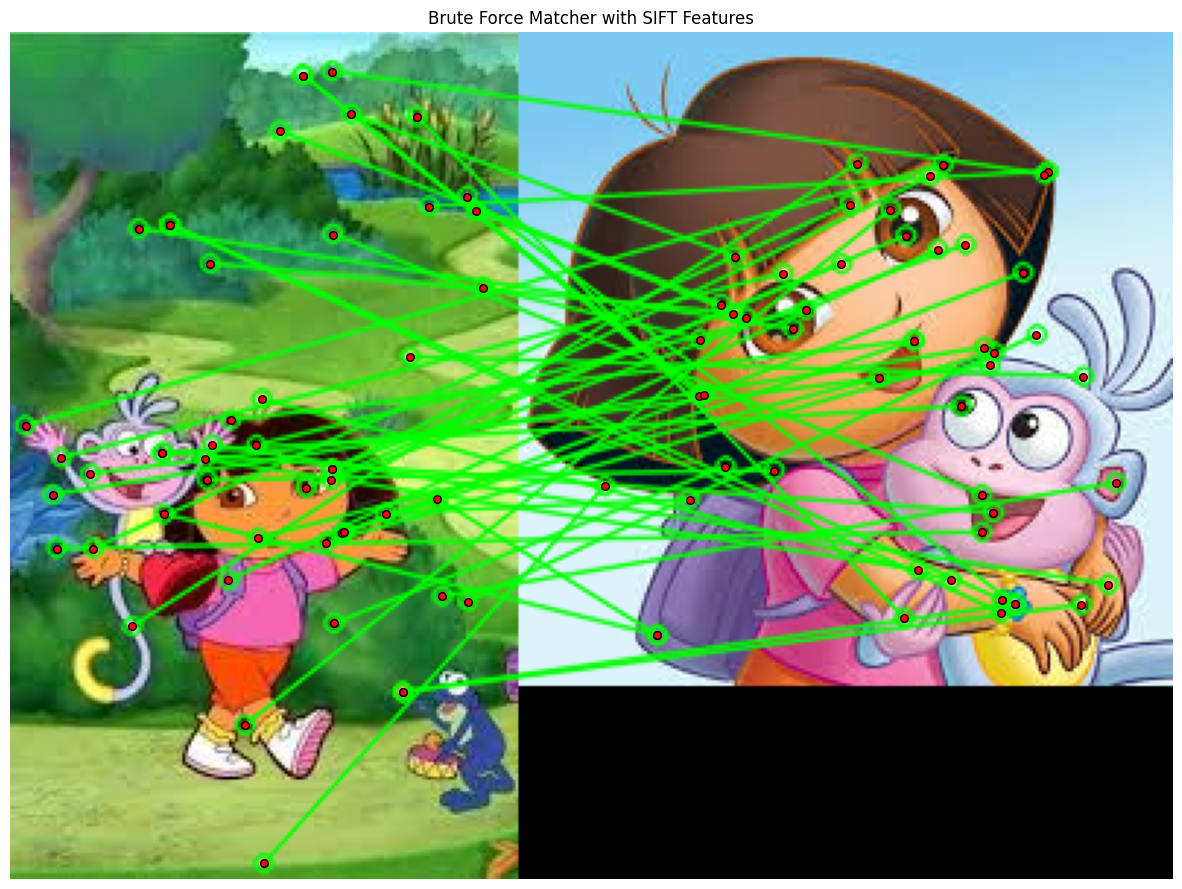

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the images
image1_path = ''
image2_path = '/content/image4.jpg'

img1 = cv2.imread(image1_path)
img2 = cv2.imread(image2_path)

# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# SIFT feature detection and computation
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Brute-force matcher with L2 norm
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Create an empty image to draw the matches
img_matches = np.zeros((max(gray1.shape[0], gray2.shape[0]), gray1.shape[1] + gray2.shape[1], 3), dtype=np.uint8)
cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], img_matches,
                matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), flags=2)

# Display the image with matches
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title('Brute Force Matcher with SIFT Features')

# Plot matching points with lines between them
for match in matches[:50]:
    img1_idx = match.queryIdx
    img2_idx = match.trainIdx
    (x1, y1) = kp1[img1_idx].pt
    (x2, y2) = kp2[img2_idx].pt

    plt.scatter([x1, x2 + gray1.shape[1]], [y1, y2], c='red', s=30, edgecolors='black', marker='o')

# Remove axis
plt.axis('off')
plt.show()


**HOUGH LINE**

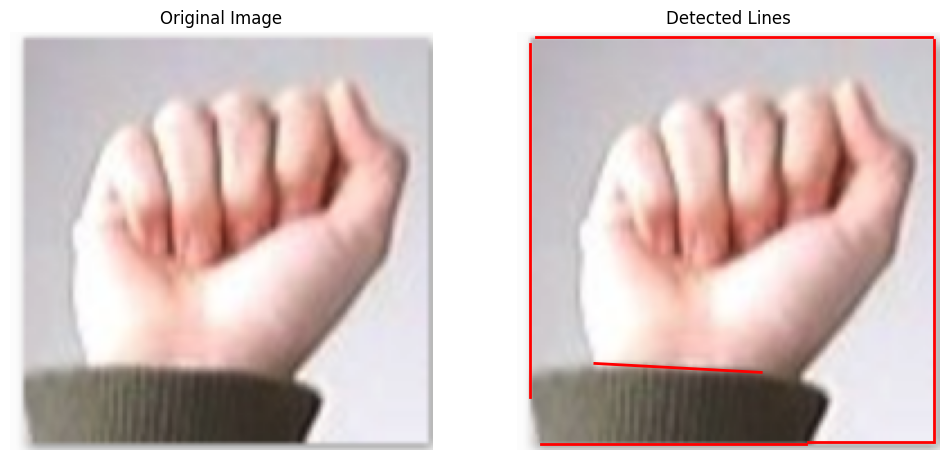

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Sample image filename
image_path ='/content/a.png'  # Upload this image to your Colab session

# Read the image
src = cv2.imread(image_path)
if src is None:
    raise FileNotFoundError(f"File '{image_path}' does not exist. Please check the file path and try again.")

# Convert to grayscale
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Perform Canny edge detection
edges = cv2.Canny(src_gray, 50, 200)

# Perform Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=50, maxLineGap=10)

# Display results in a single figure with subplots
plt.figure(figsize=(12, 6))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Plot image with detected lines
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.axis('off')

# Plot lines
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        plt.plot([x1, x2], [y1, y2], 'r-', linewidth=2)

plt.show()

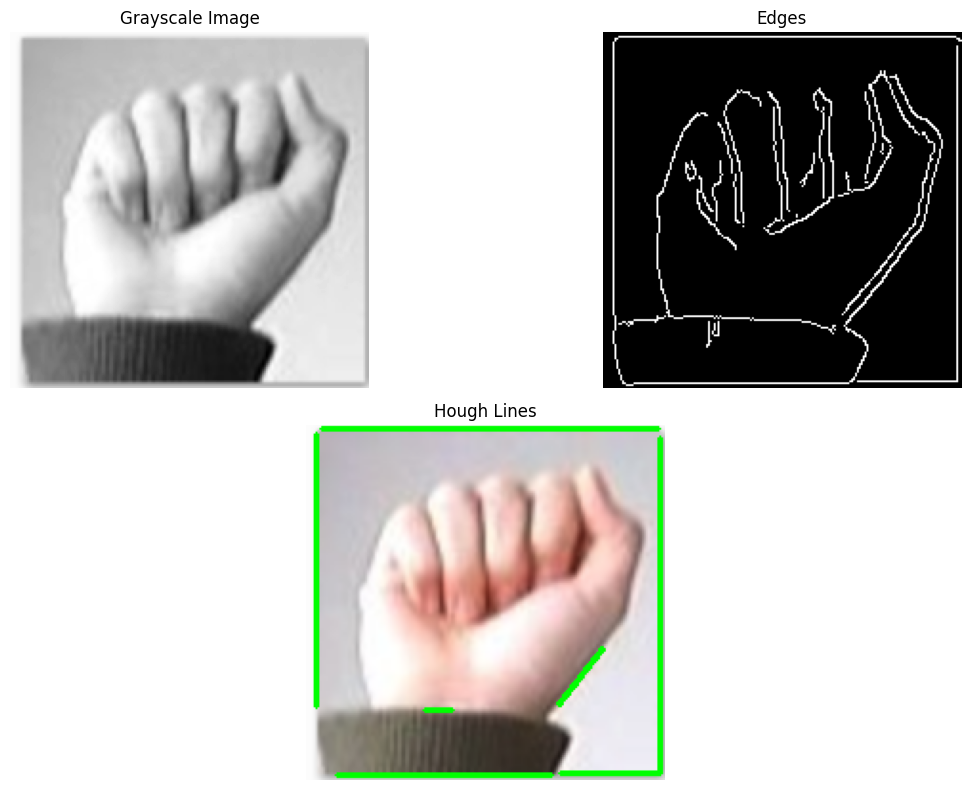

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

img = cv2.imread("/content/a.png")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform Canny edge detection
edges = cv2.Canny(gray, 50, 150)  # Adjusted threshold values

# Parameters for Hough transform
minLineLength = 3
maxLineGap = 1

# Perform Hough line detection
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength, maxLineGap)  # Adjusted parameters

# Create a new figure
plt.figure(figsize=(12, 8))

# Display grayscale image
plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Display edge-detected image
plt.subplot(2, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.axis('off')

# Display the original image with Hough lines overlayed
plt.subplot(2, 2, (3, 4))
img_with_lines = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw lines on the image
plt.imshow(img_with_lines)
plt.title('Hough Lines')
plt.axis('off')

plt.tight_layout()
plt.show()

**KMEANS**

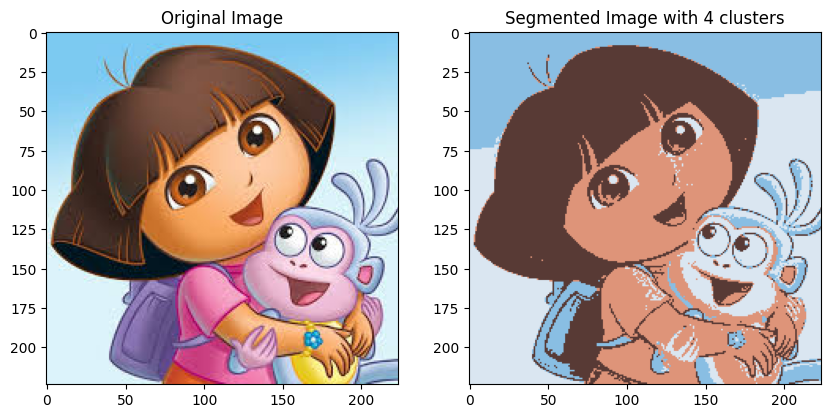

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
image = cv2.imread('/content/dora 2.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image into a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria, number of clusters(K) and apply KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 4  # Number of clusters
_, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to 8-bit values
centers = np.uint8(centers)

# Map the labels to the pixel values to recreate the image
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Plot the original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f'Segmented Image with {K} clusters')

plt.show()


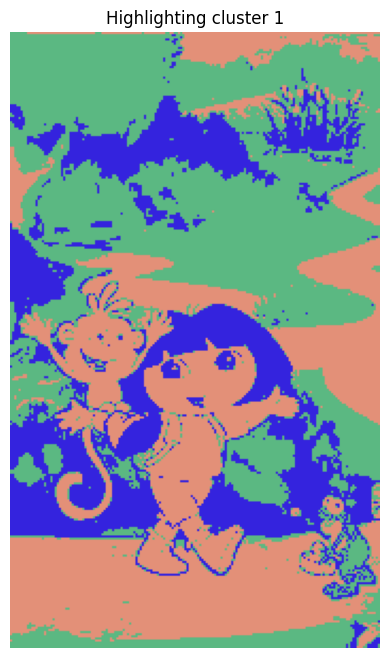

Button(description='Highlight Next Cluster', style=ButtonStyle())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files
import cv2
from IPython.display import display, clear_output
import ipywidgets as widgets



# Assuming only one image is uploaded, we access the file name
image_path = "/content/dora 1.jpeg"
image = cv2.imread(image_path)

# Convert BGR to RGB for displaying with matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image data for clustering
rows, cols, channels = image.shape
pixels = image.reshape(rows * cols, channels).astype(float)

# Number of clusters
num_clusters = 3  # You can change this to any desired number of clusters

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, max_iter=200, random_state=42)
cluster_idx = kmeans.fit_predict(pixels)
cluster_centers = kmeans.cluster_centers_

# Generate initial colors for all clusters (these will remain unchanged)
original_colors = np.random.randint(0, 255, (num_clusters, 3))

# Variable to keep track of which cluster is being updated
current_cluster = 0

# Function to update the image, changing the color of the current cluster only
def update_image():
    global current_cluster

    # Start with the original colors
    recolored_pixels = np.zeros_like(pixels)

    # Use the original colors for all clusters
    for i in range(num_clusters):
        recolored_pixels[cluster_idx == i, :] = original_colors[i, :]

    # Temporarily change the color of the current cluster (highlight it)
    highlighted_color = np.random.randint(0, 255, 3)
    recolored_pixels[cluster_idx == current_cluster, :] = highlighted_color

    # Reshape back into image dimensions
    recolored_image = recolored_pixels.reshape(rows, cols, channels).astype(np.uint8)

    # Clear previous output and display the updated image
    clear_output(wait=True)

    plt.figure(figsize=(10, 8))
    plt.imshow(recolored_image)
    plt.title(f'Highlighting cluster {current_cluster + 1}')
    plt.axis('off')
    plt.show()

    # Display the button again after clearing the output
    display(button)

    # Move to the next cluster, cycling back to the first one after the last
    current_cluster = (current_cluster + 1) % num_clusters

# Create a button for changing colors
button = widgets.Button(description="Highlight Next Cluster")

# Set the action to be performed when the button is clicked
def on_button_click(b):
    update_image()

# Link button click to the function
button.on_click(on_button_click)

# Display the button and the original image initially
display(button)

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.title('Click the button to highlight clusters one by one')
plt.axis('off')
plt.show()


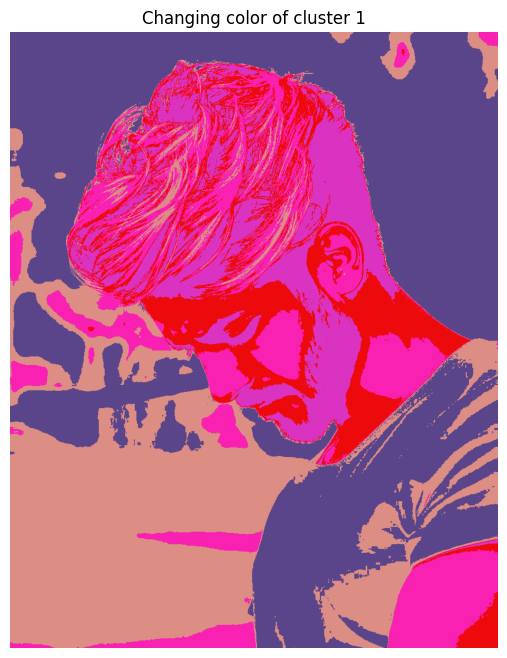

Button(description='Change Color of Next Cluster', style=ButtonStyle())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files
import cv2
from IPython.display import display, clear_output
import ipywidgets as widgets

# Upload the image
uploaded = files.upload()

# Assuming only one image is uploaded, we access the file name
image_path = next(iter(uploaded))
image = cv2.imread(image_path)

# Convert BGR to RGB for displaying with matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image data for clustering
rows, cols, channels = image.shape
pixels = image.reshape(rows * cols, channels).astype(float)

# Number of clusters
num_clusters = 5  # You can change this to any desired number of clusters

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, max_iter=200, random_state=42)
cluster_idx = kmeans.fit_predict(pixels)
cluster_centers = kmeans.cluster_centers_

# Generate initial random colors for all clusters
random_colors = np.random.randint(0, 255, (num_clusters, 3))

# Variable to keep track of which cluster is being updated
current_cluster = 0

# Function to update the image, changing the color of the current cluster
def update_image():
    global current_cluster

    # Only change the color of the current cluster
    random_colors[current_cluster] = np.random.randint(0, 255, 3)

    # Recolor the pixels based on the cluster they belong to
    recolored_pixels = np.zeros_like(pixels)
    for i in range(num_clusters):
        recolored_pixels[cluster_idx == i, :] = random_colors[i, :]

    # Reshape back into image dimensions
    recolored_image = recolored_pixels.reshape(rows, cols, channels).astype(np.uint8)

    # Clear previous output and display the updated image
    clear_output(wait=True)

    plt.figure(figsize=(10, 8))
    plt.imshow(recolored_image)
    plt.title(f'Changing color of cluster {current_cluster + 1}')
    plt.axis('off')
    plt.show()

    # Display the button again after clearing the output
    display(button)

    # Move to the next cluster, cycling back to the first one after the last
    current_cluster = (current_cluster + 1) % num_clusters

# Create a button for changing colors
button = widgets.Button(description="Change Color of Next Cluster")

# Set the action to be performed when the button is clicked
def on_button_click(b):
    update_image()

# Link button click to the function
button.on_click(on_button_click)

# Display the button and the original image initially
display(button)

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.title('Click the button to change colors of clusters one by one')
plt.axis('off')
plt.show()


**PCA**

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
Silhouette Score without PCA: 0.2304
Silhouette Score with PCA: 0.4776


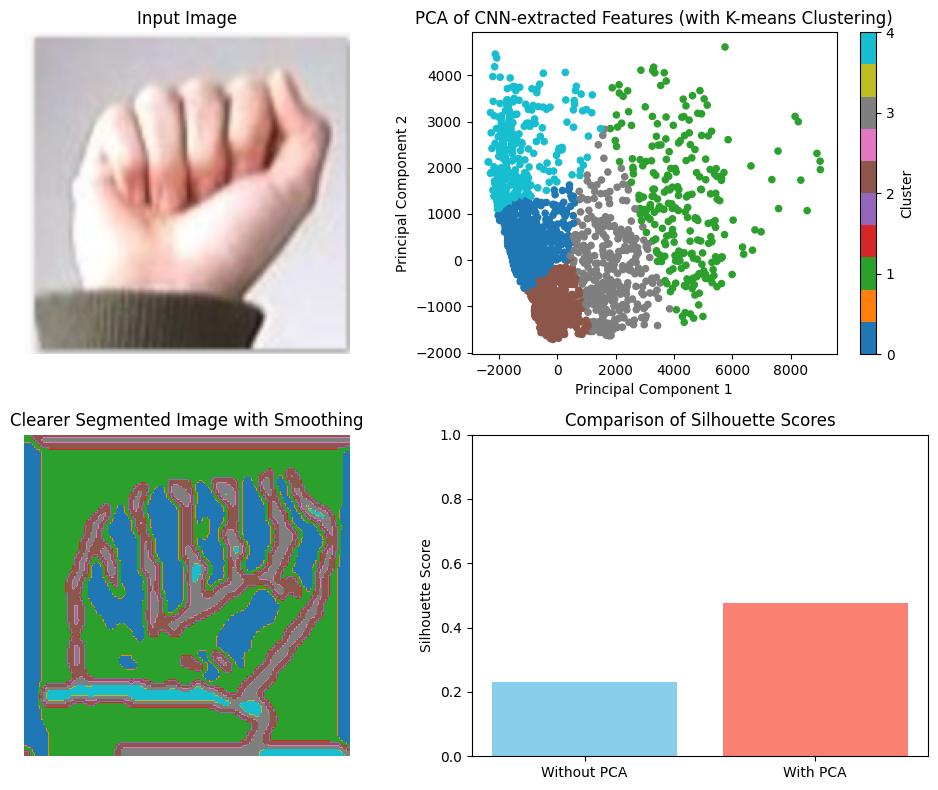

In [ ]:
# Import necessary libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

image_path = '/content/a.png'

def extract_features_with_cnn(image_path):
    base_model = VGG16(weights='imagenet', include_top=False)
    # Extract features from an earlier layer for even higher resolution
    model = Model(inputs=base_model.inputs, outputs=base_model.get_layer('block2_pool').output)

    img = cv.imread(image_path)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_resized = cv.resize(img_rgb, (224, 224))
    img_array = np.expand_dims(img_resized, axis=0)
    img_preprocessed = preprocess_input(img_array)

    features = model.predict(img_preprocessed)
    features_reshaped = features.reshape(-1, features.shape[-1])

    return features_reshaped, img_rgb, features.shape[1:3]  # Return spatial dimensions

def kmeans_with_and_without_pca(image_path, cluster_n):
    features, img_rgb, feature_map_size = extract_features_with_cnn(image_path)

    # KMeans clustering without PCA
    kmeans_no_pca = KMeans(n_clusters=cluster_n, random_state=42)
    labels_no_pca = kmeans_no_pca.fit_predict(features)

    silhouette_no_pca = silhouette_score(features, labels_no_pca)
    print(f"Silhouette Score without PCA: {silhouette_no_pca:.4f}")

    # KMeans clustering with PCA
    pca = PCA(n_components=2)
    features_pca = pca.fit_transform(features)

    kmeans_pca = KMeans(n_clusters=cluster_n, random_state=42)
    labels_pca = kmeans_pca.fit_predict(features_pca)

    silhouette_pca = silhouette_score(features_pca, labels_pca)
    print(f"Silhouette Score with PCA: {silhouette_pca:.4f}")

    # Segmented image visualization (no PCA)
    segmented_img = labels_no_pca.reshape(feature_map_size)  # Reshape labels to feature map size

    # Resize segmented image back to original image size
    segmented_img_resized = cv.resize(segmented_img.astype(np.uint8), (img_rgb.shape[1], img_rgb.shape[0]), interpolation=cv.INTER_LINEAR)

    # Apply a bilateral filter for edge-aware smoothing (preserves edges)
    segmented_img_filtered = cv.bilateralFilter(segmented_img_resized, d=9, sigmaColor=75, sigmaSpace=75)

    # Plotting the results in a 2x2 grid with reduced size
    plt.figure(figsize=(10, 8))  # Reduced figsize

    # Original image
    plt.subplot(2, 2, 1)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title('Input Image')

    # PCA feature plot
    plt.subplot(2, 2, 2)
    scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels_pca, cmap='tab10', s=20)
    plt.colorbar(scatter, ticks=range(cluster_n), label='Cluster')
    plt.title('PCA of CNN-extracted Features (with K-means Clustering)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Segmented image
    plt.subplot(2, 2, 3)
    plt.imshow(segmented_img_filtered, cmap='tab10')
    plt.axis('off')
    plt.title('Clearer Segmented Image with Smoothing')

    # Silhouette score comparison plot
    plt.subplot(2, 2, 4)
    scores = [silhouette_no_pca, silhouette_pca]
    labels = ['Without PCA', 'With PCA']
    plt.bar(labels, scores, color=['skyblue', 'salmon'])
    plt.ylabel('Silhouette Score')
    plt.title('Comparison of Silhouette Scores')
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()

# Running the KMeans clustering with CNN features
cluster_n = 5
kmeans_with_and_without_pca(image_path, cluster_n)

**FASTER RCNN**

Saving 4a444d3083a21006679bf473571363ed (1).jpg to 4a444d3083a21006679bf473571363ed (1) (1).jpg


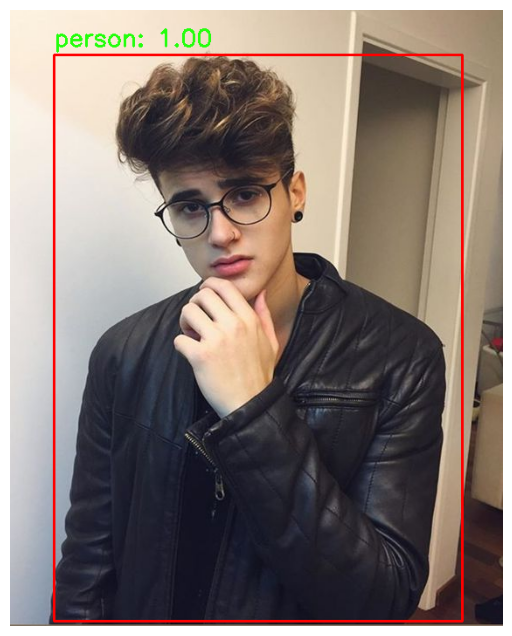

In [ ]:
import cv2
import numpy as np
import torch
from torchvision import models
import torchvision.transforms as T
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()

# Get the file name of the uploaded image
image_path = list(uploaded.keys())[0]

# Load the pre-trained Faster R-CNN model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Function to compute IoU (Intersection over Union)
def compute_iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1_p, y1_p, x2_p, y2_p = box2

    # Calculate the intersection area
    inter_x1 = max(x1, x1_p)
    inter_y1 = max(y1, y1_p)
    inter_x2 = min(x2, x2_p)
    inter_y2 = min(y2, y2_p)
    inter_area = max(0, inter_x2 - inter_x1 + 1) * max(0, inter_y2 - inter_y1 + 1)

    # Calculate the area of both the boxes
    box1_area = (x2 - x1 + 1) * (y2 - y1 + 1)
    box2_area = (x2_p - x1_p + 1) * (y2_p - y1_p + 1)

    # Calculate the union area
    union_area = box1_area + box2_area - inter_area

    # Compute the IoU
    iou = inter_area / union_area

    return iou

# Function to perform object detection and display accuracy on bounding boxes
def detect_objects(image_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Image not loaded. Check the file path.")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image_rgb)

    # Perform detection
    with torch.no_grad():
        output = model([image_tensor])

    boxes = output[0]['boxes'].numpy()
    labels = output[0]['labels'].numpy()
    scores = output[0]['scores'].numpy()

    # COCO dataset labels
    coco_labels = [
        '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
        # (continues...)
    ]

    detection_threshold = 0.7

    # Assuming ground truth boxes and labels (for accuracy calculation)
    # Replace this with actual ground truth data in your case
    ground_truth_boxes = [(50, 50, 200, 200)]  # Example ground truth
    ground_truth_labels = [1]  # Corresponding labels for ground truth

    # IoU threshold for a "correct" detection
    iou_threshold = 0.5

    # Draw detected boxes and display IoU or confidence
    for i in range(len(boxes)):
        if scores[i] > detection_threshold:
            (x1, y1, x2, y2) = boxes[i].astype(int)
            label = coco_labels[labels[i]]

            # Draw the bounding box
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)

            # Calculate IoU with ground truth (for accuracy display)
            iou = 0
            for gt_box in ground_truth_boxes:
                iou = compute_iou(boxes[i], gt_box)
                if iou > iou_threshold:
                    break

            # Add label and IoU/Confidence score
            text = f"{label}: {iou:.2f}" if iou > iou_threshold else f"{label}: {scores[i]:.2f}"
            cv2.putText(image_rgb, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Show the image with detections and IoU/Confidence scores
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Run detection and show IoU/Confidence in bounding boxes
if image_path:
    detect_objects(image_path)


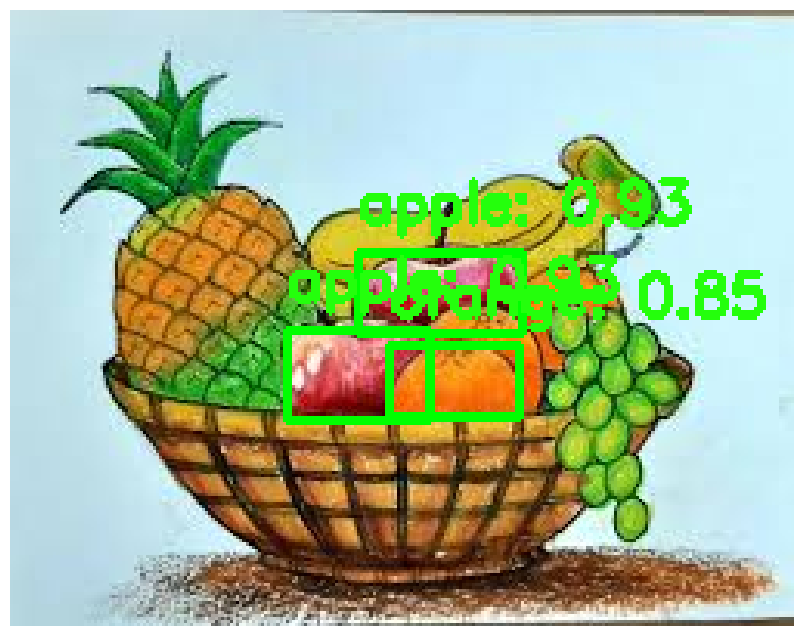

In [ ]:
import cv2
import numpy as np
import torch
from torchvision import models
import torchvision.transforms as T
import matplotlib.pyplot as plt

image_path = "/content/download.jpeg"

# Load the pre-trained Mask R-CNN model
model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

def detect_objects(image_path):
    # Read the input image
    image = cv2.imread(image_path)

    # Check if the image is loaded properly
    if image is None:
        print("Error: Image not loaded. Check the file path or ensure the file exists.")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Transform image to match the model's input requirements
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image_rgb)

    with torch.no_grad():
        output = model([image_tensor])

    boxes = output[0]['boxes'].numpy()
    labels = output[0]['labels'].numpy()
    scores = output[0]['scores'].numpy()

    # COCO dataset labels
    coco_labels = [
        '_background_', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
        'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
        'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
        'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
        'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
        'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
        'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet',
        'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
        'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
    ]

    detection_threshold = 0.7

    for i in range(len(boxes)):
        if scores[i] > detection_threshold:
            # Draw the bounding box
            (x1, y1, x2, y2) = boxes[i].astype(int)
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Label with object name and confidence score
            label = f"{coco_labels[labels[i]]}: {scores[i]:.2f}"
            # Reduce font size by decreasing the font scale (second argument in putText)
            font_scale = 0.6  # You can adjust this to a smaller value for smaller text
            cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (36, 255, 12), 2)

    # Display the image with bounding boxes
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Call the function with the specified image path
if image_path:
    detect_objects(image_path)


**WATER**

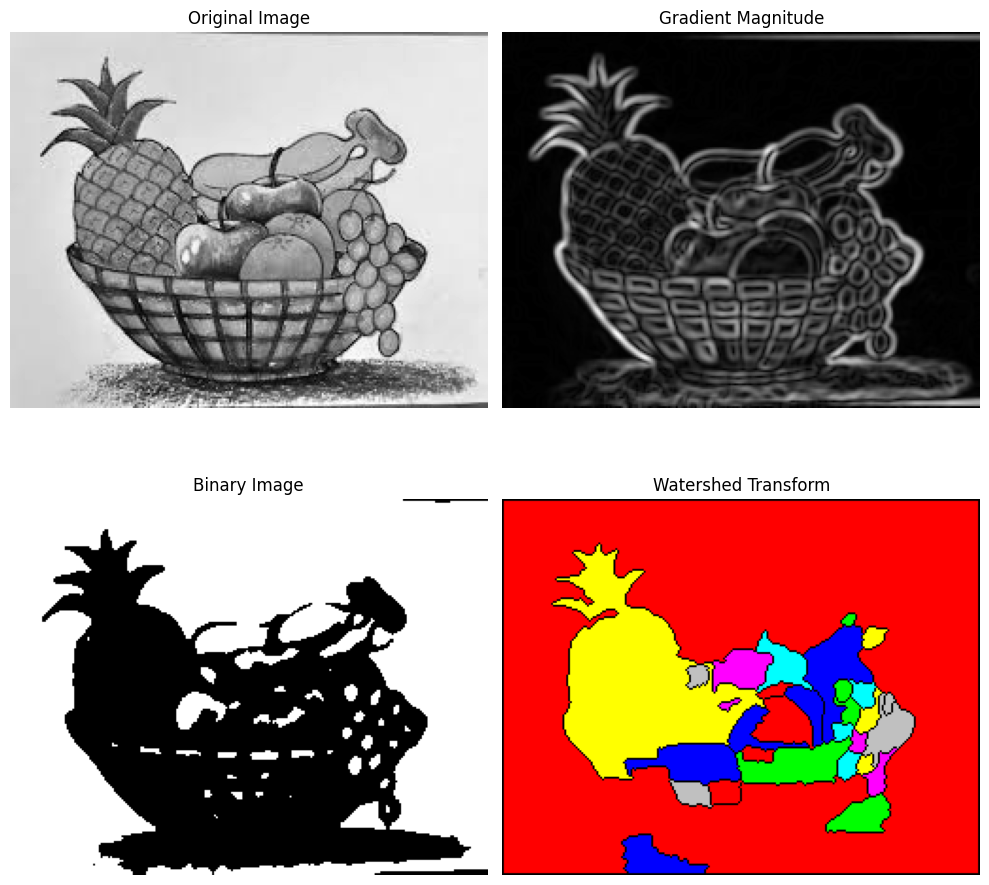

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

I = cv2.imread("/content/download.jpeg")

# Check if the image is read correctly
if I is None:
    raise FileNotFoundError('Could not open or find the image.')

# Step 2: Convert to Grayscale (if necessary)
if len(I.shape) == 3:
    I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Step 3: Noise Reduction
I_filtered = cv2.GaussianBlur(I, (5, 5), 2)  # Apply Gaussian filter to reduce noise

# Step 4: Compute the Gradient Magnitude
sobelx = cv2.Sobel(I_filtered, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(I_filtered, cv2.CV_64F, 0, 1, ksize=3)
gradmag = np.sqrt(sobelx**2 + sobely**2)

# Step 5: Marker-Based Segmentation
_, binary_image = cv2.threshold(I_filtered, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
D = ndi.distance_transform_edt(binary_image)
local_max = cv2.dilate(cv2.erode(D, None), None)
markers, _ = ndi.label(local_max)
gradmag2 = cv2.watershed(cv2.cvtColor((gradmag * 255 / gradmag.max()).astype(np.uint8), cv2.COLOR_GRAY2BGR), markers)

# Step 6: Apply the Watershed Transform
labels = cv2.watershed(cv2.cvtColor(I_filtered, cv2.COLOR_GRAY2BGR), gradmag2)

# Step 7: Define 7 distinct colors for visualization
colors = [
    [255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0],
    [0, 255, 255], [255, 0, 255], [192, 192, 192]
]

# Create an empty image for the result
Lrgb = np.zeros((*labels.shape, 3), dtype=np.uint8)

# Color the regions
for label in np.unique(labels):
    if label == -1:  # Ignore background
        continue
    mask = labels == label
    color_idx = (label - 1) % 7
    Lrgb[mask] = colors[color_idx]

# Step 8: Visualize the Results
plt.figure(figsize=(10, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(I, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Gradient Magnitude
plt.subplot(2, 2, 2)
plt.imshow(gradmag, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

# Binary Image
plt.subplot(2, 2, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

# Watershed Transform
plt.subplot(2, 2, 4)
plt.imshow(Lrgb)
plt.title('Watershed Transform')
plt.axis('off')

plt.tight_layout()
plt.show()